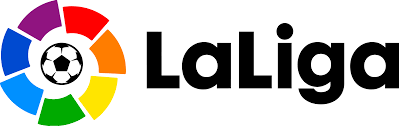

1. Read the data set and replace dashes with 0 to make sure you can perform arithmetic operations on the data. (5 points)

2. Print all the teams which have started playing between 1930-1980. (5 points)

3. Print the list of teams which came Top 5 in terms of points (5 points)

4. Write a function with name “Goal_diff_count” which should return all the teams with their Goal Differences. Using the same function, find the team which has maximum and minimum goal difference. (5 points) Goal_diff_count = GoalsFor - GoalsAgainst

5. Create a new column with name “Winning Percent” and append it to the data set (5 points) Percentage of Winning = (GamesWon / GamesPlayed)*100 If there are any numerical error, replace it with 0% Print the top 5 teams which has the highest Winning percentage

6. Group teams based on their “Best position” and print the sum of their points for all positions (5 points) Eg: Best Position Points
   1                              25000
   2                              7000      


In [1]:
#importing required library
import pandas as pd
import numpy as np

# Read the data set and replace dashes with 0 to make sure you can perform arithmetic operations on the data. (5 points)

In [2]:
#reading laliga csv file
laliga = pd.read_csv('Laliga.csv',header=1)
laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [3]:
laliga.tail()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
56,57,Xerez,1,34,38,8,10,20,38,66,-,-,-,-,-,-,-,2009-10,2009-10,20
57,58,Condal,1,22,30,7,8,15,37,57,-,-,-,-,-,-,-,1956-57,1956-57,16
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,-,-,-,-,-,-,-,1951-52,1951-52,16
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,-,-,-,-,-,-,-,1955-56,1955-56,15
60,61,Girona,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2017-18,2017-18,9


In [4]:
#print a summary of the dataframe
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            61 non-null     int64 
 1   Team           61 non-null     object
 2   Seasons        61 non-null     int64 
 3   Points         61 non-null     object
 4   GamesPlayed    61 non-null     object
 5   GamesWon       61 non-null     object
 6   GamesDrawn     61 non-null     object
 7   GamesLost      61 non-null     object
 8   GoalsFor       61 non-null     object
 9   GoalsAgainst   61 non-null     object
 10  Champion       61 non-null     object
 11  Runner-up      61 non-null     object
 12  Third          61 non-null     object
 13  Fourth         61 non-null     object
 14  Fifth          61 non-null     object
 15  Sixth          61 non-null     object
 16  T              61 non-null     object
 17  Debut          61 non-null     object
 18  Since/LastApp  61 non-null     o

In [5]:
#describe the dataframe
laliga.describe()

,Pos,Seasons,BestPosition
count,61.000000,61.000000,61.000000
mean,31.000000,24.000000,7.081967
std,17.752934,26.827225,5.276663
min,1.000000,1.000000,1.000000
25%,16.000000,4.000000,3.000000
50%,31.000000,12.000000,6.000000
75%,46.000000,38.000000,10.000000
max,61.000000,86.000000,20.000000


In [6]:
#counting rows as columns
laliga.shape

(61, 20)

Replace dashes with 0

In [7]:
# Using replace() - Replace values given in `to_replace` with `value`.
laliga.replace('-',0,inplace=True)

Convert the datatype into int for performing the operations.
Considering the champions and runnerup in (Deportivo La Coruna) team.
Addition

In [8]:
laliga.iloc[:,10].astype(int) + laliga.iloc[:,11].astype(int)

0     56
1     50
2     18
3     12
4     15
      ..
56     0
57     0
58     0
59     0
60     0
Length: 61, dtype: int64

# 2. Print all the teams which have started playing between 1930-1980.

Below teams started playing between 1930-1980.

In [9]:
#Using Series.str and slice the first 4 characters, then cast to int:Then filter with Series.between and boolean indexing:
DebutYear = laliga[laliga['Debut'].astype(str).str[:4].astype(int).between(1930, 1980)]


#DebutYear[['Team','Debut']].count()   #37rows
DebutYear[['Team','Debut']]

,Team,Debut
3,Valencia,1931-32
5,Sevilla,1934-35
8,Zaragoza,1939-40
9,Real Betis,1932-33
10,Deportivo La Coruna,1941-42
11,Celta Vigo,1939-40
12,Valladolid,1948-49
14,Sporting Gijon,1944-45
15,Osasuna,1935-36
16,Malaga,1949-50


# 3. Print the list of teams which came Top 5 in terms of points (5 points)
Printing the list of teams which came Top 5 in terms of points

In [10]:
# For using sort_values() function changing the datatype from str to int.
laliga['Points'] = laliga['Points'].astype(int)

In [11]:
# Giving "ascending = False" for getting the largest values on the top or arranging it in the descending order. Using head()
# for picking top records.
laliga[['Points','Team']].sort_values(by = 'Points',ascending = False).head(5)

,Points,Team
0,4385,Real Madrid
1,4262,Barcelona
2,3442,Atletico Madrid
3,3386,Valencia
4,3368,Athletic Bilbao


# 4. Write a function with name “Goal_diff_count” which should return all the teams with their Goal Differences. Using the same function, find the team which has maximum and minimum goal difference. 



In [12]:
def Goal_diff_count():   
     laliga['Goal_diff_count'] = laliga['GoalsFor'].astype(int)-laliga['GoalsAgainst'].astype(int)
     # if require to get the absolute value below line can be used
     # df_Laliga['Goal_diff_count'] = df_Laliga['Goal_diff_count'].abs()
     return laliga[['Team','Goal_diff_count']].sort_values(by = 'Goal_diff_count',ascending=False)
    
Goal_diff_count()

,Team,Goal_diff_count
0,Real Madrid,2807
1,Barcelona,2786
2,Atletico Madrid,1225
4,Athletic Bilbao,931
3,Valencia,929
...,...,...
27,Murcia,-385
19,Las Palmas,-399
14,Sporting Gijon,-399
12,Valladolid,-413


# finding the team which has maximum and minimum goal difference.

In [13]:
print("The team which has maximum goal difference is :")
Goal_diff_count().head(1)

The team which has maximum goal difference is :


,Team,Goal_diff_count
0,Real Madrid,2807


In [14]:
print("The team which has minimum goal difference is :")
Goal_diff_count().tail(1)

The team which has minimum goal difference is :


,Team,Goal_diff_count
13,Racing Santander,-525


# 5. Create a new column with name “Winning Percent” and append it to the data set (5 points) Percentage of Winning = (GamesWon / GamesPlayed)*100 If there are any numerical error, replace it with 0% Print the top 5 teams which has the highest Winning percentage

In [15]:
#Percentage of Winning = (GamesWon / GamesPlayed)*100 
laliga['Winning Percent'] = (laliga['GamesWon'].astype(int)/laliga['GamesPlayed'].astype(int)) *100


In [16]:
laliga['Winning Percent'].fillna(0,inplace = True)

In [17]:
#Check
laliga[['Team','Winning Percent']].head(5)

,Team,Winning Percent
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629


# 6. Group teams based on their “Best position” and print the sum of their points for all positions (5 points)
Eg: BestPosition Points 1 25000 2 7000

In [18]:
#Storing in the object for using sum().
grouped_BestPosition = laliga[['Team','Points','BestPosition']].groupby('BestPosition')
grouped_BestPosition

In [19]:
#Compute sum of group values
grouped_BestPosition.sum()

,Points
BestPosition,
1,27933
2,6904
3,5221
4,6563
5,1884
6,2113
7,1186
8,1134
9,96
